In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet, LassoLars

In [3]:
train=pd.read_csv("./data/train/datacontinuousstudents_train.csv")
train=train.drop(['id'], axis=1)
#train.head()

In [4]:
X_train=train.drop(['y'], axis=1)
Y_train=train['y']
X_train.shape, Y_train.shape

((120, 32), (120,))

In [5]:
test=pd.read_csv("./data/test/datacontinuousstudents_test.csv")
test=test.drop(['id'], axis=1)
#test.head()

In [6]:
X_test=test.drop(['y'], axis=1)
Y_test=test['y']
X_test.shape, Y_test.shape

((30, 32), (30,))

#### Análisis variables numéricas vs target

Resumen estadístico

In [7]:
train.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.513959,64.574126,49.281667,0.300000,0.141667,0.041667,0.108333,0.083333,15.299094,27.791667,...,0.219333,0.039371,6.366667,5.558333,81.542031,0.108333,0.050000,3.841667,0.281920,0.489820
std,2.250778,9.488580,40.817030,0.460179,0.350170,0.200664,0.312104,0.277544,1.937916,15.292056,...,0.342694,0.149234,0.897553,1.002483,48.853216,0.312104,0.218859,2.153738,0.191636,0.295519
min,-6.143410,41.696000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,10.617270,0.000000,...,0.000000,0.000000,4.000000,3.000000,13.533800,0.000000,0.000000,1.000000,0.016302,0.032387
25%,-0.849932,57.820250,14.975000,0.000000,0.000000,0.000000,0.000000,0.000000,14.282493,27.000000,...,0.001375,0.000000,6.000000,5.000000,46.428100,0.000000,0.000000,2.000000,0.099620,0.191323
50%,0.563972,67.946500,36.300000,0.000000,0.000000,0.000000,0.000000,0.000000,15.437490,31.000000,...,0.019950,0.000100,6.000000,6.000000,69.777400,0.000000,0.000000,4.000000,0.247636,0.455207
75%,2.237177,71.359000,76.150000,1.000000,0.000000,0.000000,0.000000,0.000000,16.399015,40.250000,...,0.239000,0.001850,7.000000,6.000000,105.504000,0.000000,0.000000,6.000000,0.426950,0.795187
max,6.800272,78.836829,173.700000,1.000000,1.000000,1.000000,1.000000,1.000000,20.584160,45.000000,...,0.991800,0.846600,8.000000,7.000000,344.830000,1.000000,1.000000,7.000000,0.662330,0.996328


Correlación

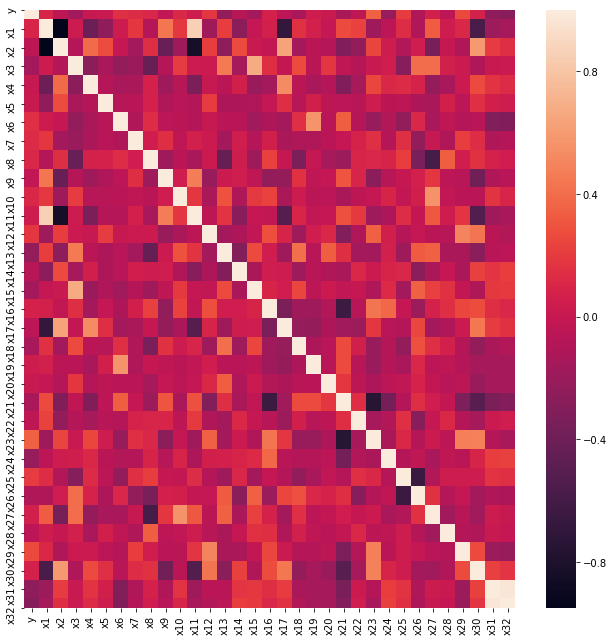

In [8]:
corrmat = train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

Estandarización de regresoras Train

In [9]:
columns=X_train.columns.values.tolist()

In [10]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_train=scaler.transform(X_train.fillna(0))

In [12]:
X_train=pd.DataFrame(X_train, columns=columns)

Estandarización de regresoras Test

In [13]:
columns1=X_test.columns.values.tolist()

In [14]:
X_test=scaler.transform(X_test.fillna(0))

In [15]:
X_test=pd.DataFrame(X_test, columns=columns1)

In [16]:
alpha=0.01

In [17]:
# Modelo con todas las características para determinar importancia

seed_val = 99
np.random.seed(seed_val)

model_all_features = LassoLars(alpha=alpha)

model_all_features.fit(X_train, Y_train)

y_pred_test = model_all_features.predict(X_test)
r2_score_all = r2_score(Y_test, y_pred_test)
print('Test all features model R2 = %f' % (r2_score_all))

Test all features model R2 = -0.010589


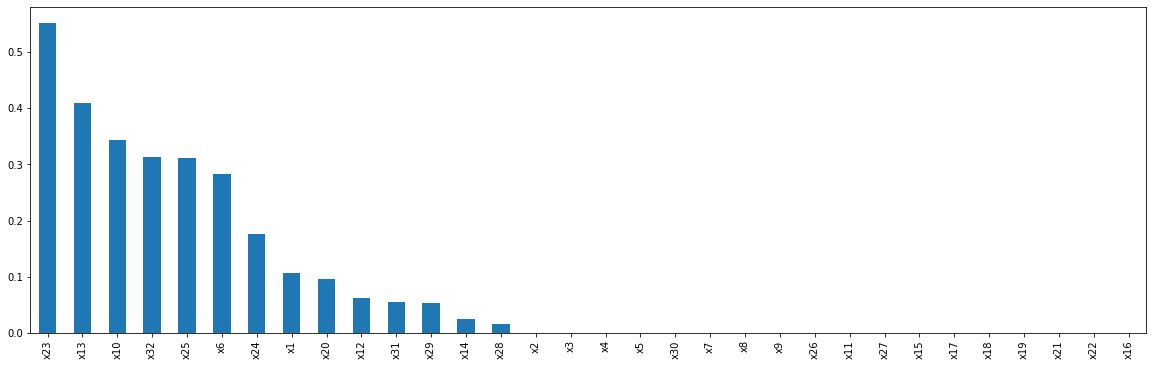

In [18]:
features = pd.Series(abs(model_all_features.coef_)) # esto con valor absoluto?
features.index = X_train.columns

features.sort_values(ascending=False, inplace=True)

features.plot.bar(figsize=(20,6))

In [19]:
# view the list of ordered features
features = list(features.index)
features

['x23',
 'x13',
 'x10',
 'x32',
 'x25',
 'x6',
 'x24',
 'x1',
 'x20',
 'x12',
 'x31',
 'x29',
 'x14',
 'x28',
 'x2',
 'x3',
 'x4',
 'x5',
 'x30',
 'x7',
 'x8',
 'x9',
 'x26',
 'x11',
 'x27',
 'x15',
 'x17',
 'x18',
 'x19',
 'x21',
 'x22',
 'x16']

In [20]:
# Modelo con la característca más importante (desde la que se inicia la adición)

seed_val = 99
np.random.seed(seed_val)

model_one_feature = LassoLars(alpha=alpha)

model_one_feature.fit(X_train[features[0]].to_frame(), Y_train)

y_pred_test = model_one_feature.predict(X_test[features[0]].to_frame())
r2_score_first = r2_score(Y_test, y_pred_test)
print('Test one feature model R2=%f' % (r2_score_first))

Test one feature model R2=-0.005410


In [21]:
# Adición de características y evaluación de modelos, una a la vez (en orden de importancia)

tol = 0.001

print('doing recursive feature addition')

features_to_keep = [features[0]]

count = 1

for feature in features[1:]:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    model_int = LassoLars(alpha=alpha)

    model_int.fit(
        X_train[features_to_keep + [feature] ], Y_train)

    y_pred_test = model_int.predict(
        X_test[features_to_keep + [feature] ])

    r2_score_int = r2_score(Y_test, y_pred_test)
    print('New Test R2={}'.format((r2_score_int)))

    print('All features Test R2={}'.format((r2_score_first)))

    diff_r2 = r2_score_int - r2_score_first

    if diff_r2 >= tol:
        print('Increase in r2 = {}'.format(diff_r2))
        print('keep: ', feature)
        print

        r2_score_first = r2_score_int

        features_to_keep.append(feature)
    else:
        print('Increase in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print

print()
print('DONE!!')
print('total features to keep: ', len(features_to_keep))
print('selected features: ', features_to_keep)
print('final test R2 score={}'.format(r2_score_first))

doing recursive feature addition

testing feature:  x13  which is feature  1  out of  32
New Test R2=-0.09947201603823475
All features Test R2=-0.005410132971367165
Increase in r2 = -0.09406188306686758
remove:  x13

testing feature:  x10  which is feature  2  out of  32
New Test R2=0.01480260901354491
All features Test R2=-0.005410132971367165
Increase in r2 = 0.020212741984912075
keep:  x10

testing feature:  x32  which is feature  3  out of  32
New Test R2=0.013234288974341313
All features Test R2=0.01480260901354491
Increase in r2 = -0.0015683200392035967
remove:  x32

testing feature:  x25  which is feature  4  out of  32
New Test R2=0.06476994968154326
All features Test R2=0.01480260901354491
Increase in r2 = 0.04996734066799835
keep:  x25

testing feature:  x6  which is feature  5  out of  32
New Test R2=-0.07627819145815651
All features Test R2=0.06476994968154326
Increase in r2 = -0.14104814113969977
remove:  x6

testing feature:  x24  which is feature  6  out of  32
New Test 

In [22]:
# Modelo con características seleccionadas

seed_val = 99
np.random.seed(seed_val)

final_model = LassoLars(alpha=alpha)

final_model.fit(X_train[features_to_keep], Y_train)

y_pred_test = final_model.predict(X_test[features_to_keep])

r2_score_final = r2_score(Y_test, y_pred_test)
print('Test selected features R2=%f' % (r2_score_final))

mse = mean_squared_error(Y_test, y_pred_test)
print('Test selected features mse=%f' % (mse))

Test selected features R2=0.152413
Test selected features mse=2.580581
